<a href="https://colab.research.google.com/github/gokul-pv/EVA6_Assignmets_Session6/blob/main/EVA6_Session_6_Different_Norms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [120]:
import sys
folder = '/content/gdrive/MyDrive/Colab Notebooks'
sys.path.append(folder)

**Importing the necessary modules**

In [121]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision

import numpy as np
import matplotlib.pyplot as plt


**Data Transformations**

In [122]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])



# Dataset and Creating Train/Test Split

In [123]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders

In [124]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like.It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [125]:
'''Accessing a batch '''
sample_batch=next(iter(train_loader))
x1,y1=sample_batch

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


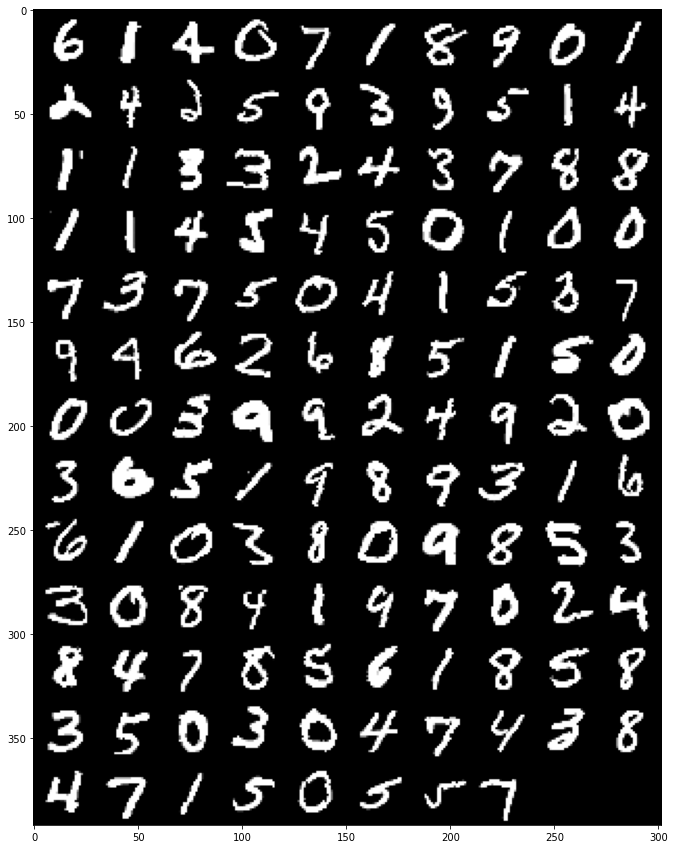

In [126]:
'''Creating a grid of images'''
grid = torchvision.utils.make_grid(x1, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

**Importing the Model**

In [127]:
import model

**Model summary - Batch norm**

In [130]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model1 = model.Net().to(device)
summary(model1, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
         Dropout2d-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
         Dropout2d-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 12, 10, 10]           1,080
             ReLU-11           [-1, 12, 10, 10]               0
      BatchNorm2d-12           [-1, 12, 10, 10]              24
        Dropout2d-13           [-1, 12, 10, 10]               0
           Conv2d-14             [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


**Model summary - Layer norm**

In [131]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model2 = model.Net('l').to(device)
summary(model2, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         LayerNorm-3            [-1, 8, 26, 26]          10,816
         Dropout2d-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
         LayerNorm-7           [-1, 10, 24, 24]          11,520
         Dropout2d-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 12, 10, 10]           1,080
             ReLU-11           [-1, 12, 10, 10]               0
        LayerNorm-12           [-1, 12, 10, 10]           2,400
        Dropout2d-13           [-1, 12, 10, 10]               0
           Conv2d-14             [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


**Model summary - Group norm**

In [132]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model3 = model.Net('g').to(device)
summary(model3, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
         Dropout2d-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
         GroupNorm-7           [-1, 10, 24, 24]              20
         Dropout2d-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 12, 10, 10]           1,080
             ReLU-11           [-1, 12, 10, 10]               0
        GroupNorm-12           [-1, 12, 10, 10]              24
        Dropout2d-13           [-1, 12, 10, 10]               0
           Conv2d-14             [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


**Defining L1 Loss**

In [110]:
def L1_Loss(model, data, factor=0.0005):
  l1_crit = nn.L1Loss().to(device)
  reg_loss = 0
  
  for param in model.parameters():
    zero_vector = torch.rand_like(param) * 0
    reg_loss += l1_crit(param, zero_vector)

  
  return factor * reg_loss

**Defining Train and Test Functions**

In [111]:
from tqdm import tqdm

# Set isL1 = False for Batch norm without L1 loss and isL1 = True for batch norm with L1 Loss

def train(model, device, train_loader, optimizer, epoch, train_losses, train_accuracy, isL1=False):

  model.train()
  pbar = tqdm(train_loader)
  train_loss = 0
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)

    #Calculate L1 loss
    if(isL1==True):
      loss += L1_Loss(model,data,factor=0.0005)

    train_loss += loss.item()
    # train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'EPOCH = {epoch} Loss = {loss.item()} Batch_id = {batch_idx} Accuracy = {100*correct/processed:0.2f}')
    # train_acc.append(100*correct/processed)

  train_loss /= len(train_loader.dataset)    
  train_losses.append(train_loss)
  train_accuracy.append(100. * correct / len(train_loader.dataset))  

def test(model, device, test_loader, test_losses, test_accuracy, misclassified):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

            for i in range(len(pred)):
              if pred[i]!= target[i]:
                misclassified.append([data[i], pred[i], target[i]])

            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracy.append(100. * correct / len(test_loader.dataset))

    print('\nTest set: Average loss = {:.4f}, Accuracy = {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # test_acc.append(100. * correct / len(test_loader.dataset))

**Define plotting function for misclassified images**

In [112]:
def plot_misclassified(misclassified):
  fig = plt.figure(figsize = (10,10))
  for i in range(10):
        sub = fig.add_subplot(5, 2, i+1)
        plt.imshow(misclassified[i][0].cpu().numpy().squeeze(),cmap='gray',interpolation='none')
        
        sub.set_title("Pred={}, Act={}".format(str(misclassified[i][1].data.cpu().numpy()),str(misclassified[i][2].data.cpu().numpy())))
        
  plt.tight_layout()
  plt.show()

**Selecting the optmizer and Training for 20 epoch**

**Batch norm with L1**

  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
EPOCH = 0 Loss = 0.15153206884860992 Batch_id = 468 Accuracy = 86.15: 100%|██████████| 469/469 [00:16<00:00, 29.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0739, Accuracy = 9802/10000 (98.02%)



EPOCH = 1 Loss = 0.210500106215477 Batch_id = 468 Accuracy = 97.16: 100%|██████████| 469/469 [00:16<00:00, 28.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0435, Accuracy = 9875/10000 (98.75%)



EPOCH = 2 Loss = 0.10732124000787735 Batch_id = 468 Accuracy = 97.75: 100%|██████████| 469/469 [00:16<00:00, 28.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0368, Accuracy = 9888/10000 (98.88%)



EPOCH = 3 Loss = 0.061471521854400635 Batch_id = 468 Accuracy = 98.12: 100%|██████████| 469/469 [00:16<00:00, 28.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0310, Accuracy = 9900/10000 (99.00%)



EPOCH = 4 Loss = 0.04243249446153641 Batch_id = 468 Accuracy = 98.31: 100%|██████████| 469/469 [00:16<00:00, 28.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0290, Accuracy = 9908/10000 (99.08%)



EPOCH = 5 Loss = 0.0400979109108448 Batch_id = 468 Accuracy = 98.50: 100%|██████████| 469/469 [00:16<00:00, 28.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0246, Accuracy = 9931/10000 (99.31%)



EPOCH = 6 Loss = 0.035951677709817886 Batch_id = 468 Accuracy = 98.51: 100%|██████████| 469/469 [00:16<00:00, 28.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0213, Accuracy = 9940/10000 (99.40%)



EPOCH = 7 Loss = 0.009327573701739311 Batch_id = 468 Accuracy = 98.67: 100%|██████████| 469/469 [00:16<00:00, 28.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0226, Accuracy = 9929/10000 (99.29%)



EPOCH = 8 Loss = 0.05971653014421463 Batch_id = 468 Accuracy = 98.71: 100%|██████████| 469/469 [00:16<00:00, 29.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0217, Accuracy = 9932/10000 (99.32%)



EPOCH = 9 Loss = 0.022371657192707062 Batch_id = 468 Accuracy = 98.70: 100%|██████████| 469/469 [00:16<00:00, 29.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0193, Accuracy = 9942/10000 (99.42%)



EPOCH = 10 Loss = 0.028806906193494797 Batch_id = 468 Accuracy = 98.83: 100%|██████████| 469/469 [00:16<00:00, 28.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0184, Accuracy = 9943/10000 (99.43%)



EPOCH = 11 Loss = 0.04386519640684128 Batch_id = 468 Accuracy = 98.81: 100%|██████████| 469/469 [00:16<00:00, 29.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0189, Accuracy = 9944/10000 (99.44%)



EPOCH = 12 Loss = 0.01599741168320179 Batch_id = 468 Accuracy = 98.81: 100%|██████████| 469/469 [00:16<00:00, 29.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0219, Accuracy = 9935/10000 (99.35%)



EPOCH = 13 Loss = 0.038346514105796814 Batch_id = 468 Accuracy = 98.97: 100%|██████████| 469/469 [00:16<00:00, 29.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0212, Accuracy = 9936/10000 (99.36%)



EPOCH = 14 Loss = 0.03827539086341858 Batch_id = 468 Accuracy = 98.92: 100%|██████████| 469/469 [00:16<00:00, 29.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0184, Accuracy = 9941/10000 (99.41%)



EPOCH = 15 Loss = 0.05376237630844116 Batch_id = 468 Accuracy = 98.95: 100%|██████████| 469/469 [00:16<00:00, 28.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0174, Accuracy = 9948/10000 (99.48%)



EPOCH = 16 Loss = 0.02334117330610752 Batch_id = 468 Accuracy = 98.99: 100%|██████████| 469/469 [00:16<00:00, 27.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0187, Accuracy = 9942/10000 (99.42%)



EPOCH = 17 Loss = 0.07933522760868073 Batch_id = 468 Accuracy = 98.98: 100%|██████████| 469/469 [00:16<00:00, 27.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0185, Accuracy = 9939/10000 (99.39%)



EPOCH = 18 Loss = 0.04128282889723778 Batch_id = 468 Accuracy = 99.06: 100%|██████████| 469/469 [00:16<00:00, 28.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0219, Accuracy = 9933/10000 (99.33%)



EPOCH = 19 Loss = 0.011808536015450954 Batch_id = 468 Accuracy = 98.99: 100%|██████████| 469/469 [00:17<00:00, 27.57it/s]



Test set: Average loss = 0.0173, Accuracy = 9946/10000 (99.46%)



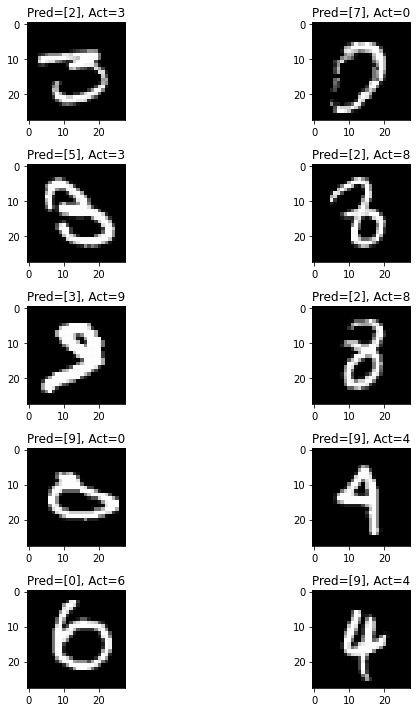

In [113]:
EPOCHS = 20

train_losses_l1 = []
train_accuracy_l1 = []
test_losses_l1  = []
test_accuracy_l1  = []
misclassified_l1 = []

from torch.optim.lr_scheduler import StepLR
model =  model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

for epoch in range(EPOCHS):
    train(model, device, train_loader, optimizer, epoch, train_losses_l1, train_accuracy_l1, True ) 
    # scheduler.step()
    test(model, device, test_loader, test_losses_l1, test_accuracy_l1, misclassified_l1)   

plot_misclassified(misclassified_l1) 

**Layer norm**

  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
EPOCH = 0 Loss = 0.09766826033592224 Batch_id = 468 Accuracy = 87.05: 100%|██████████| 469/469 [00:14<00:00, 32.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.1080, Accuracy = 9753/10000 (97.53%)



EPOCH = 1 Loss = 0.061364490538835526 Batch_id = 468 Accuracy = 97.01: 100%|██████████| 469/469 [00:14<00:00, 32.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0575, Accuracy = 9853/10000 (98.53%)



EPOCH = 2 Loss = 0.07519621402025223 Batch_id = 468 Accuracy = 97.71: 100%|██████████| 469/469 [00:14<00:00, 32.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0421, Accuracy = 9884/10000 (98.84%)



EPOCH = 3 Loss = 0.0396883487701416 Batch_id = 468 Accuracy = 98.02: 100%|██████████| 469/469 [00:14<00:00, 32.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0398, Accuracy = 9890/10000 (98.90%)



EPOCH = 4 Loss = 0.023034512996673584 Batch_id = 468 Accuracy = 98.26: 100%|██████████| 469/469 [00:14<00:00, 32.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0397, Accuracy = 9893/10000 (98.93%)



EPOCH = 5 Loss = 0.054217804223299026 Batch_id = 468 Accuracy = 98.46: 100%|██████████| 469/469 [00:14<00:00, 31.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0336, Accuracy = 9900/10000 (99.00%)



EPOCH = 6 Loss = 0.06195645034313202 Batch_id = 468 Accuracy = 98.51: 100%|██████████| 469/469 [00:14<00:00, 31.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0328, Accuracy = 9903/10000 (99.03%)



EPOCH = 7 Loss = 0.027330800890922546 Batch_id = 468 Accuracy = 98.63: 100%|██████████| 469/469 [00:14<00:00, 32.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0283, Accuracy = 9916/10000 (99.16%)



EPOCH = 8 Loss = 0.014783033169806004 Batch_id = 468 Accuracy = 98.69: 100%|██████████| 469/469 [00:14<00:00, 32.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0274, Accuracy = 9921/10000 (99.21%)



EPOCH = 9 Loss = 0.033465463668107986 Batch_id = 468 Accuracy = 98.70: 100%|██████████| 469/469 [00:14<00:00, 32.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0274, Accuracy = 9916/10000 (99.16%)



EPOCH = 10 Loss = 0.031125066801905632 Batch_id = 468 Accuracy = 98.78: 100%|██████████| 469/469 [00:14<00:00, 32.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0266, Accuracy = 9917/10000 (99.17%)



EPOCH = 11 Loss = 0.01532189641147852 Batch_id = 468 Accuracy = 98.81: 100%|██████████| 469/469 [00:14<00:00, 32.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0253, Accuracy = 9929/10000 (99.29%)



EPOCH = 12 Loss = 0.020343102514743805 Batch_id = 468 Accuracy = 98.89: 100%|██████████| 469/469 [00:14<00:00, 32.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0256, Accuracy = 9919/10000 (99.19%)



EPOCH = 13 Loss = 0.05312176048755646 Batch_id = 468 Accuracy = 98.94: 100%|██████████| 469/469 [00:14<00:00, 32.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0238, Accuracy = 9922/10000 (99.22%)



EPOCH = 14 Loss = 0.010243338532745838 Batch_id = 468 Accuracy = 98.95: 100%|██████████| 469/469 [00:14<00:00, 33.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0262, Accuracy = 9928/10000 (99.28%)



EPOCH = 15 Loss = 0.018511200323700905 Batch_id = 468 Accuracy = 98.92: 100%|██████████| 469/469 [00:14<00:00, 33.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0306, Accuracy = 9915/10000 (99.15%)



EPOCH = 16 Loss = 0.021193644031882286 Batch_id = 468 Accuracy = 99.00: 100%|██████████| 469/469 [00:14<00:00, 32.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0241, Accuracy = 9922/10000 (99.22%)



EPOCH = 17 Loss = 0.015203987248241901 Batch_id = 468 Accuracy = 99.06: 100%|██████████| 469/469 [00:14<00:00, 32.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0234, Accuracy = 9927/10000 (99.27%)



EPOCH = 18 Loss = 0.048570141196250916 Batch_id = 468 Accuracy = 99.01: 100%|██████████| 469/469 [00:14<00:00, 32.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0220, Accuracy = 9934/10000 (99.34%)



EPOCH = 19 Loss = 0.05727614834904671 Batch_id = 468 Accuracy = 99.04: 100%|██████████| 469/469 [00:14<00:00, 32.61it/s]



Test set: Average loss = 0.0217, Accuracy = 9929/10000 (99.29%)



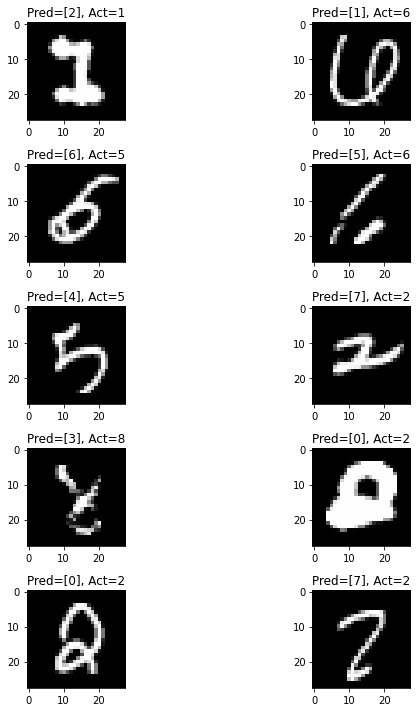

In [114]:
EPOCHS = 20

train_losses_layer = []
train_accuracy_layer = []
test_losses_layer  = []
test_accuracy_layer  = []
misclassified_layer = []

from torch.optim.lr_scheduler import StepLR
model =  model.Net('l').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

for epoch in range(EPOCHS):
    train(model, device, train_loader, optimizer, epoch, train_losses_layer,train_accuracy_layer )
    # scheduler.step()
    test(model, device, test_loader, test_losses_layer, test_accuracy_layer, misclassified_layer)   

plot_misclassified(misclassified_layer) 

**Group norm**

  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
EPOCH = 0 Loss = 0.10296262055635452 Batch_id = 468 Accuracy = 87.49: 100%|██████████| 469/469 [00:14<00:00, 32.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0662, Accuracy = 9829/10000 (98.29%)



EPOCH = 1 Loss = 0.12845519185066223 Batch_id = 468 Accuracy = 97.39: 100%|██████████| 469/469 [00:14<00:00, 32.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0457, Accuracy = 9859/10000 (98.59%)



EPOCH = 2 Loss = 0.06572576612234116 Batch_id = 468 Accuracy = 98.00: 100%|██████████| 469/469 [00:14<00:00, 32.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0433, Accuracy = 9866/10000 (98.66%)



EPOCH = 3 Loss = 0.1020783856511116 Batch_id = 468 Accuracy = 98.12: 100%|██████████| 469/469 [00:14<00:00, 33.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0375, Accuracy = 9881/10000 (98.81%)



EPOCH = 4 Loss = 0.021262818947434425 Batch_id = 468 Accuracy = 98.42: 100%|██████████| 469/469 [00:14<00:00, 32.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0312, Accuracy = 9906/10000 (99.06%)



EPOCH = 5 Loss = 0.015868673101067543 Batch_id = 468 Accuracy = 98.46: 100%|██████████| 469/469 [00:14<00:00, 33.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0318, Accuracy = 9897/10000 (98.97%)



EPOCH = 6 Loss = 0.0715697705745697 Batch_id = 468 Accuracy = 98.62: 100%|██████████| 469/469 [00:14<00:00, 33.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0289, Accuracy = 9916/10000 (99.16%)



EPOCH = 7 Loss = 0.01949782483279705 Batch_id = 468 Accuracy = 98.63: 100%|██████████| 469/469 [00:14<00:00, 32.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0246, Accuracy = 9930/10000 (99.30%)



EPOCH = 8 Loss = 0.01539147924631834 Batch_id = 468 Accuracy = 98.77: 100%|██████████| 469/469 [00:14<00:00, 33.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0263, Accuracy = 9930/10000 (99.30%)



EPOCH = 9 Loss = 0.009885180741548538 Batch_id = 468 Accuracy = 98.80: 100%|██████████| 469/469 [00:14<00:00, 33.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0281, Accuracy = 9915/10000 (99.15%)



EPOCH = 10 Loss = 0.02658783830702305 Batch_id = 468 Accuracy = 98.89: 100%|██████████| 469/469 [00:14<00:00, 33.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0251, Accuracy = 9928/10000 (99.28%)



EPOCH = 11 Loss = 0.013664215803146362 Batch_id = 468 Accuracy = 98.89: 100%|██████████| 469/469 [00:14<00:00, 32.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0225, Accuracy = 9926/10000 (99.26%)



EPOCH = 12 Loss = 0.02502686344087124 Batch_id = 468 Accuracy = 98.94: 100%|██████████| 469/469 [00:14<00:00, 32.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0225, Accuracy = 9931/10000 (99.31%)



EPOCH = 13 Loss = 0.01604456454515457 Batch_id = 468 Accuracy = 98.98: 100%|██████████| 469/469 [00:14<00:00, 32.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0219, Accuracy = 9936/10000 (99.36%)



EPOCH = 14 Loss = 0.08872037380933762 Batch_id = 468 Accuracy = 98.99: 100%|██████████| 469/469 [00:14<00:00, 32.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0217, Accuracy = 9932/10000 (99.32%)



EPOCH = 15 Loss = 0.011448883451521397 Batch_id = 468 Accuracy = 99.01: 100%|██████████| 469/469 [00:14<00:00, 33.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0226, Accuracy = 9929/10000 (99.29%)



EPOCH = 16 Loss = 0.012979644350707531 Batch_id = 468 Accuracy = 98.95: 100%|██████████| 469/469 [00:14<00:00, 32.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0230, Accuracy = 9929/10000 (99.29%)



EPOCH = 17 Loss = 0.01678665168583393 Batch_id = 468 Accuracy = 99.08: 100%|██████████| 469/469 [00:14<00:00, 32.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0209, Accuracy = 9936/10000 (99.36%)



EPOCH = 18 Loss = 0.14100593328475952 Batch_id = 468 Accuracy = 99.08: 100%|██████████| 469/469 [00:14<00:00, 32.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss = 0.0193, Accuracy = 9943/10000 (99.43%)



EPOCH = 19 Loss = 0.010691034607589245 Batch_id = 468 Accuracy = 99.13: 100%|██████████| 469/469 [00:14<00:00, 33.18it/s]



Test set: Average loss = 0.0204, Accuracy = 9948/10000 (99.48%)



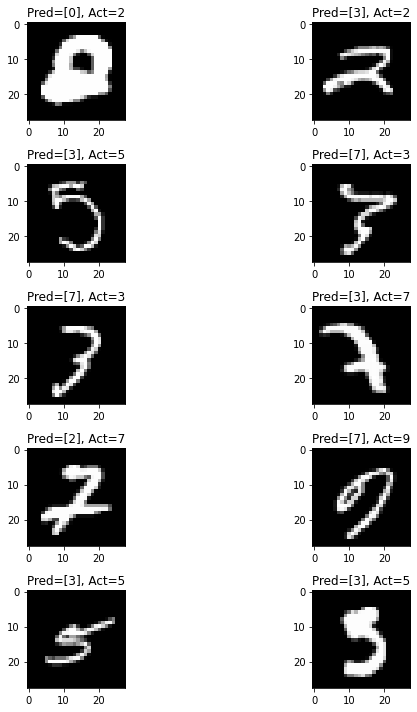

In [115]:
EPOCHS = 20

train_losses_group = []
train_accuracy_group = []
test_losses_group  = []
test_accuracy_group  = []
misclassified_group = []

from torch.optim.lr_scheduler import StepLR
model =  model.Net('g').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

for epoch in range(EPOCHS):
    train(model, device, train_loader, optimizer, epoch, train_losses_group,train_accuracy_group )
    # scheduler.step()
    test(model, device, test_loader, test_losses_group, test_accuracy_group, misclassified_group)   

plot_misclassified(misclassified_group) 

**Ploting the average loss and accurarcy for all the normalisation methods**

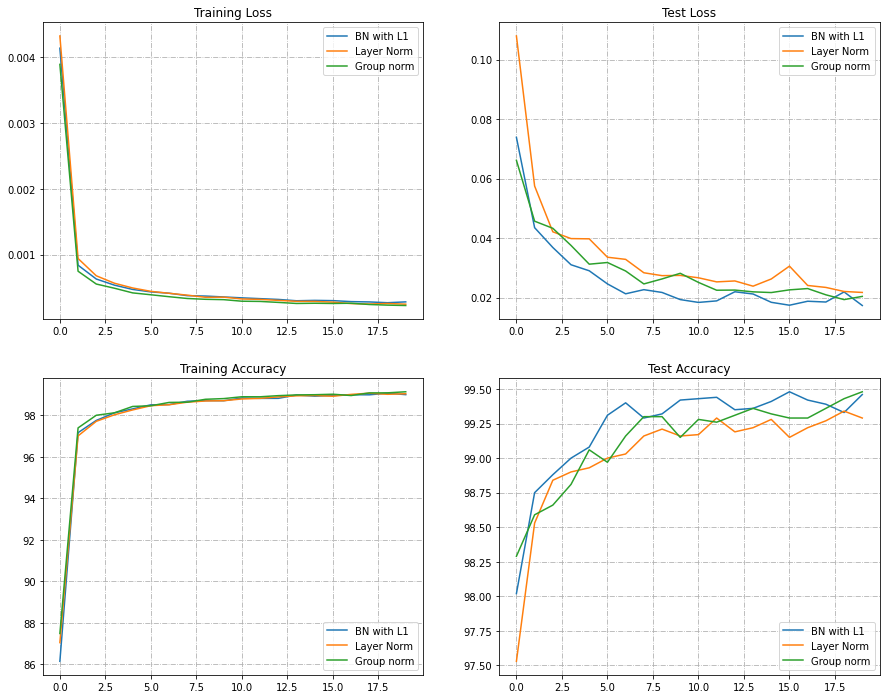

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,12))
axs[0, 0].plot(train_losses_l1, label='BN with L1')
axs[0, 0].plot(train_losses_layer, label='Layer Norm')
axs[0, 0].plot(train_losses_group, label='Group norm')
axs[0, 0].grid(linestyle='-.')
axs[0, 0].set_title("Training Loss")
axs[0, 0].legend()

axs[1, 0].plot(train_accuracy_l1, label='BN with L1')
axs[1, 0].plot(train_accuracy_layer, label='Layer Norm')
axs[1, 0].plot(train_accuracy_group, label='Group norm')
axs[1, 0].grid(linestyle='-.')
axs[1, 0].set_title("Training Accuracy")
axs[1, 0].legend()

axs[0, 1].plot(test_losses_l1, label='BN with L1')
axs[0, 1].plot(test_losses_layer, label='Layer Norm')
axs[0, 1].plot(test_losses_group, label='Group norm')
axs[0, 1].grid(linestyle='-.')
axs[0, 1].set_title("Test Loss")
axs[0, 1].legend()

axs[1, 1].plot(test_accuracy_l1, label='BN with L1')
axs[1, 1].plot(test_accuracy_layer, label='Layer Norm')
axs[1, 1].plot(test_accuracy_group, label='Group norm')
axs[1, 1].grid(linestyle='-.')
axs[1, 1].set_title("Test Accuracy")
axs[1, 1].legend()